# 4.1 判别函数

第三章主要介绍了线性模型在回归问题中的应用。

现在我们考虑分类问题：对于一个输入向量 $\bf x$，我们的目标是将它划分为 $K$ 类中的一类 ${\cal C}_k$，其中$k=1,\dots,K$。

通常这些类别都是不相交的，因此每个输入只对应于一个类别。这样，我们相当于将输入空间划分为多个决策区域，不同决策区域的边界叫做决策面（`decision surfaces`）。在本章，我们考虑线性分类模型。此时，决策面由输入向量 $\bf x$ 的线性函数决定，因此是一个输入 $D$ 维空间中的一个 $D-1$ 维的超平面。

能被线性决策面完全分开的数据称为线性可分的。

对于回归问题，我们的目标值就是我们的预测值；对于分类问题，由于类别是离散的，不能直接预测，我们需要用一些其他方式来表示我们的类别。对于概率模型，最简单的方式是 0-1 表示。例如，对于二类问题，我们用单一目标值 $t\in\{0,1\}$ 来表示类别，$t = 1$ 表示类别 ${\cal C}_1$，$t = 0$ 表示类别 ${\cal C}_2$，此时，$t$ 可以看成是样本属于类别 ${\cal C}_1$ 的概率。

对于 $K > 2$ 的情况，1-hot是一种常用的表示方法，即用一个 $K$ 维的 0-1 向量 $\bf t$ 表示类别，当类别为 ${\cal C}_j$ 时，除了 $t_j$ 为 1 之外，其他的 $t_k$ 都为 0。例如 $K = 5, j = 2$ 的情况对应于目标向量：

$$
\mathbf t = (0,1,0,0,0)^\top
$$

同样，我们也可以将 $t_k$ 看成是类别是 ${\cal C}_k$ 的概率。

在线性回归模型中，预测值 $y({\bf x, w})$ 是一个关于参数 $\bf w$ 的一个线性函数。最简单的情况为 $y({\bf x})=f({\bf w^\top x} + w_0)$，此时 $y$ 可以为任意一个实数。而在线性分类的模型中，我们的预测值可以看成是概率，因此要限制在 $(0,1)$ 之间。为此，我们将上面的模型一般化，在参数 $\bf w$ 的线性函数之上，加一个非线性函数 $f(·)$：

$$
y({\bf x})=f({\bf w^\top x} + w_0)
$$

函数 $f$ 通常被叫做激活函数（`activation function`）。决策面对应与 $y({\bf x})={\rm constant}$，所以这相当于 ${\bf w^\top x} + w_0={\rm constant}$，从而决策面对 $\bf x$ 是线性的，即使激活函数 $f(·)$ 是非线性的。不过，由于函数对参数 $\bf w$ 不是线性的，因此计算和优化与线性回归模型不同。

在第一章，我们讨论了三种解决分类问题的方法：判别函数，判别式模型 $p({\cal C}_k|{\bf x})$，产生式模型 $p({\bf x}|{\cal C}_k)$。

首先，讨论最简单的线性判别函数。

Generalized Linear Model(GLM):

(1) 当 f 是 nonlinear function 的时候,GLM 是一个classification model

(2) 当 f 是 identity function 的时候， GLM 是一个 regression model

## 4.1.1 二类问题

对于二类问题，最简单的线性判别函数为：

$$
y({\bf x})={\bf w^\top x} + w_0
$$

其中 $\bf w$ 是权重（`weight vector`），$w_0$ 是偏置项（`bias`）。偏置项的相反数也叫阈值（`threshold`）。

如果 $y({\bf x})\geq 0$，那么 $\bf x$ 属于 ${\cal C}_1$ 类；否则属于 ${\cal C}_2$ 类。此时，我们的决策面为 $y(\mathbf x)=0$，对应与输入 $D$ 维空间中的一个 $D-1$ 维的超平面。

对于这个超平面上的两个点 $\mathbf x_A,\mathbf x_B$，由于 $y({\bf x}_A)=y({\bf x}_B)=0$，我们有 $\mathbf w^\top(\mathbf x_A-\mathbf x_B)=0$，从而 $\bf w$ 与超平面中的任意向量垂直，即是超平面的法向量。

根据法向量的性质，设超平面上的某点为 $\bf x$（意味着 $y({\bf x})=0$），超平面到原点的距离为

$$
\frac{\bf w^\top x}{\|\bf w\|}=-\frac{w_0}{\|\bf x\|}
$$

这样我们就看到，决策面的位置由偏置项 $w_0$ 来决定。

## 4.1.2 多分类问题

one-versus-the-rest：用K-1个二分类器来解决一个K类别分类任务

one-verse-one: 用$\frac{K(K-1)}{2}$个二分类器来解决一个K类别分类任务，两种分类方法都会造成无法分类的区域

single-K-class-discriminant: 由K个线性函数组成的一个K类别判别函数$y_{k}(x)=w_{k}^{T}+w_{k0}$，类k和类别j的决策边界时$y_{k}(x)=y_{i}(x)$也就是超平面${w_{k}-w_{j}}^{T}x+(w_{k0}-w_{j0})=0$,若一个数据点被分配给了k，则$y_{k}(x)>y_{i}(x)$。另外有凸函数的定义可以证明，这种分类函数形成凸空间，不存在无法分类的区域。

## 4.1.3 最小平方法

$$y(x)=\tilde{\mathbf W}^{T}\tilde x$$

$$E_D(\tilde{\mathbf W})=\frac{1}{2}Tr{(\tilde{\mathbf X}\tilde{\mathbf W}-T)^T(\tilde{\mathbf X}\tilde{\mathbf W}-T)}$$

$$\tilde{\mathbf W}=（{{\tilde{\mathbf X}}^T\tilde{\mathbf X}})^{-1}{\tilde{\mathbf X}}^T{\mathbf T}$$

最小平方法缺少鲁棒性，因为其对应于高斯条件分布假设下的最大似然法，而二分类向量的概率显然不是高斯分布

In [1]:
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    BayesianLogisticRegressor,
    LeastSquaresClassifier,
    LinearDiscriminantAnalyzer,
    LogisticRegressor,
    Perceptron,
    SoftmaxRegressor
)

np.random.seed(666)

In [2]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

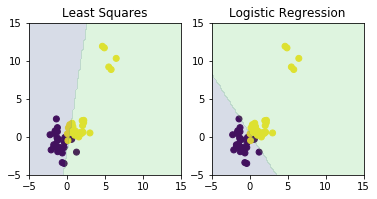

In [9]:
#最小平方与LR相比缺少鲁棒性
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regressor = LogisticRegressor()
logistic_regressor.fit(X_train, y_train)
y_lr = logistic_regressor.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

## 4.1.4 Fisher 线性判别函数

可以看作一个高维的向量投影到1维空间上，主要思想是把分类看作一个1维空间，把高维的数据投影到该空间的过程，一方面让类均值的投影分开得较大，同时让每个类别的内部方差较小，最小化类别的重叠。

$$ J(w)=\frac{w^TS_Bw}{w^TS_Ww}$$
$S_B$为类间协方差矩阵 $$S_B=(m_2-m_1)(m_2-m_1)^T$$

S_W为类内协方差矩阵$$S_W=\sum_{n \in C_1}(x_n-m_1)(x_n-m_1)^T+\sum_{n \in C_2}(x_n-m_2)(x_n-m_2)^T$$

$J(w)$取得最大值的条件为$（w^TS_Bw)S_Ww=(w^TS_Ww)S_Bw$

可以看出$w\propto {S_W}^{-1}(m_2-m_1)$,如果类内协方差为各项同性的，则w正比于类均值的差。该公式是对于数据向一维投影的方向的一个具体选择。然后投影的数据可以用来构建判别函数，方法为选择一个阈值$y_0$,使得当$y(x)\ge y_{0}$时把数据点分到$C_1$

最⼩平⽅⽅法确定线性判别函数的⽬标是使模型的预测尽可能地与⽬标值接近。相反， Fisher判别准则的⽬标是使输出空间的类别有最⼤的区分度。考察⼀下这两种⽅法之间的关系是很有趣的。对于⼆分类问题， Fisher准则可以看成最⼩平⽅的⼀个特例。

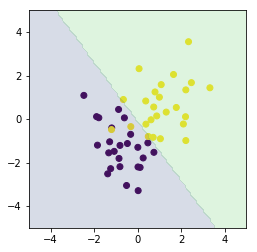

In [7]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y = model.classify(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.1.5与最小平方的关系 

我们让属于C1的⽬标值等于$\frac{N}{N_1}$ ，其中N1是类别C1的模式的数量， N是总的模式数量。这个
⽬标值近似于类别C1的先验概率的导数。对于类别C2，我们令⽬标值等于−  $\frac{N}{N_2}$，其中N2是类
别C2的模式的数量。

平方误差函数为:$$E=\frac{1}{2}\sum_{n=1}^N(w^Tx_n+w_0-t_n)^2$$
对$w_0$求导：
$$\sum_{n=1}^{N}(w^Tx_n+w_0-t_n)=0$$
对$w$求导：
$$\sum_{n=1}^{N}(w^Tx_n+w_0-t_n)x_n=0$$
再由:
$$\sum_{n=1}^Nt_n=N_1\frac{N}{N_1}-N_2\frac{N}{N_2}=0$$
得到偏置项的表达式:
$$w_0=-w^Tm$$
m是所有数据的均值:$$m=\frac{1}{N}\sum_{n=1}^Nx_n=\frac{1}{N}(N_1m_1+N_2m_2)$$

对w求导的公式就可以写为:$$(\mathbf{S_W}+\frac{N_1N_2}{N}\mathbf{S_B})w=N(m_1-m_2)$$

代入$\mathbf {S_B}$公式，可以得出:$w\propto {S_W}^{-1}(m_2-m_1)$因此权向量恰好与根据Fisher判别准则得到的结果相
同。

## 4.1.7 感知器算法

对应于⼀个⼆分类的模型，这个模型中，输⼊向量x⾸先使⽤⼀个固定的⾮线性变换得到⼀个特征向量ϕ(x)，这个特征向量然后被⽤于构造⼀个⼀般的线性模型，形式为：
$$y(x)=f(w^T(\phi(x))$$
其中激活函数:$$f(a)=\begin{cases}+1,& a\ge 0\\
-1,& a < 0\end{cases}$$

目标变量:$$t_n\begin{cases} +1,& t_n\in \mathcal C_1\\
-1,& t_n\in \mathcal C_2\end{cases}$$

寻找一个权向量$w$使得对$\mathcal C_1$中的模式$x_n$都有$w^T\phi(x_n)>0$,对于类别$\mathcal C_2$中的$x_n$有$w^T\phi(x_n)<0$,所有模式满足$w^T\phi(x_n)t_n>0$

对于正确分类的模
式，感知器准则赋予零误差，⽽对于误分类的模式$x_n$，它试着最⼩化$-w^T\phi(x_n)t_n$

$$E_p(w)=-\sum_{n\in \mathcal{M}}w^T\phi_nt_n$$

利用梯度下降优化:$$w^{\tau+1}=w^{\tau}+\eta\phi_nt_n$$

* 如果模式正确分类，那么权向量保持不变
* 如果模式被错误分类，那么对于类别C1，我们把向量$\phi(x_n)$加到当前对于权向量w的估计值上，⽽对于类别C2，我们从w中减掉向量$\phi(x_n)$